In [3]:
# (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.
import os
import pandas as pd
import glob
import re
from itertools import chain
colnames = [['min'+str(x), 'max'+str(x), 'mean'+str(x), 
             'median'+str(x), 'std'+str(x), '1stQ'+str(x), '3rdQ'+str(x)] for x in range(1,7)]
colnames = list(chain.from_iterable(colnames))
df2=pd.DataFrame()
df3=pd.DataFrame()
df5=pd.DataFrame()
df7=pd.DataFrame()
folder_list=os.listdir("/Users/guojiawei/Downloads/AReM/")
folder_list.sort()
for fold in folder_list:
  
    
    if not fold ==".DS_Store":
        if not fold.endswith("pdf"):
            
            if fold =="bending1" or fold=="bending2":
                #print(fold)
                csv_list = os.listdir("/Users/guojiawei/Downloads/AReM/"+fold+"/") 
                csv_list.sort(key=lambda x:x[7:-4])
                for csv in csv_list:
                    
                    column = ["time","avg_rss12", "var_rss12", "avg_rss13", "var_rss13","vg_rss23", "ar_rss23"]
                
                    if csv == "dataset1.csv"  or csv=="dataset2.csv":
                        
                        df0=pd.read_csv("/Users/guojiawei/Downloads/AReM/" +fold+ "/" + csv,skiprows=5, names=column,index_col = False)
                        df3=pd.concat([df3,df0],axis=0)
                        
                    else :
                    
                        df1=pd.read_csv("/Users/guojiawei/Downloads/AReM/" + fold+"/" + csv,skiprows=5, names=column,index_col = False)
                        df1=pd.DataFrame(data=df1)            
                        df2=pd.concat([df2,df1],axis=0)
            else: 
                csv_list = os.listdir("/Users/guojiawei/Downloads/AReM/"+fold+"/") 
                csv_list.sort(key=lambda x:int(x[7:-4]))
                
                for csv in csv_list:
                    
                    column = ["time","avg_rss12", "var_rss12", "avg_rss13", "var_rss13","vg_rss23", "ar_rss23"]
                
                    if csv == "dataset1.csv"  or csv=="dataset2.csv" or csv=="dataset3.csv":
                        #print(csv)
                        df4=pd.read_csv("/Users/guojiawei/Downloads/AReM/" +fold+ "/" + csv,skiprows=5, names=column,index_col = False)
                        df5=pd.concat([df5,df4],axis=0)
                    else:
                        #print(csv)
                        df6=pd.read_csv("/Users/guojiawei/Downloads/AReM/" +fold+ "/" + csv,skiprows=5, names=column,index_col = False)
                        df7=pd.concat([df7,df6],axis=0)

df5.reset_index(drop=True,inplace=True)
df7.reset_index(drop=True,inplace=True)
df_test=pd.concat([df3,df5],axis=0)
df_train=pd.concat([df2,df7],axis=0)

df_test.reset_index(drop=True,inplace=True)
df_train.reset_index(drop=True,inplace=True)
print("test data")
print(df_test)
print("training data")
print(df_train)



test data
        time  avg_rss12  var_rss12  avg_rss13  var_rss13  vg_rss23  ar_rss23
0          0      39.25       0.43      22.75       0.43     33.75      1.30
1        250      39.25       0.43      23.00       0.00     33.00      0.00
2        500      39.25       0.43      23.25       0.43     33.00      0.00
3        750      39.50       0.50      23.00       0.71     33.00      0.00
4       1000      39.50       0.50      24.00       0.00     33.00      0.00
...      ...        ...        ...        ...        ...       ...       ...
9115  118750      36.00       2.45      17.00       5.10     20.50      0.87
9116  119000      34.33       1.89      15.00       2.45     17.00      2.12
9117  119250      33.00       7.35      14.60       3.14     13.00      5.70
9118  119500      31.67       1.25      11.00       6.16     19.25      2.17
9119  119750      30.75      10.21      11.75       1.09     18.50      3.20

[9120 rows x 7 columns]
training data
         time  avg_rss12  v

# (c)i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).
(1)means   
(2)median
(3)minimum, maximum
(4)Standard deviation
(5)Maximum and minimum value
(6)Skewness
(7)Kurtosis
(8)first quartile, third quartile


# (c)ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time seriesin each instance. 

In [4]:
def sorting(s):
    activity, instance = s.split('/')[-2:]
    instance_num = int(re.search('\d+', instance)[0])
    return (activity, instance_num)
data_all = glob.glob('/Users/guojiawei/Downloads/AReM/*/*.csv')
data_all = sorted(data_all, key=sorting) 
data_1 = pd.read_csv(data_all[0], skiprows=4, usecols=[1,2,3,4,5,6])
data_11 = data_1.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
     
df_fe= pd.DataFrame(data_11.to_numpy().reshape(1,42), columns=colnames)      
for data in data_all[1:]:
    temp_df = pd.read_csv(data, skiprows=4, usecols=[1,2,3,4,5,6])
    temp_file_long = temp_df.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    df_fe = pd.concat([df_fe, pd.DataFrame(temp_file_long.to_numpy().reshape(1,42), columns=colnames)])
df_fe.reset_index(drop=True, inplace=True)   
print(df_fe)    

     min1   max1      mean1  median1      std1  1stQ1    3rdQ1  min2   max2  \
0   37.25  45.00  40.624792    40.50  1.476967  39.25  42.0000   0.0   1.30   
1   38.00  45.67  42.812812    42.50  1.435550  42.00  43.6700   0.0   1.22   
2   35.00  47.40  43.954500    44.33  1.558835  43.00  45.0000   0.0   1.70   
3   33.00  47.75  42.179813    43.50  3.670666  39.15  45.0000   0.0   3.00   
4   33.00  45.75  41.678063    41.75  2.243490  41.33  42.7500   0.0   2.83   
..    ...    ...        ...      ...       ...    ...      ...   ...    ...   
83  19.50  45.33  33.586875    34.25  4.650935  30.25  37.0000   0.0  14.67   
84  19.75  45.50  34.322750    35.25  4.752477  31.00  38.0000   0.0  13.47   
85  19.50  46.00  34.546229    35.25  4.842294  31.25  37.8125   0.0  12.47   
86  23.50  46.25  34.873229    35.25  4.531720  31.75  38.2500   0.0  14.82   
87  19.25  44.00  34.473188    35.00  4.796705  31.25  38.0000   0.0  13.86   

       mean2  ...      std5    1stQ5  3rdQ5  min6  

# (c)iii. Use your judgement to select the three most important time-domain features
 I will select std which can show the condition of dispersion, mean which can show the condition of overall data and max which can compare with std and mean.

# (d)iDepict scatter plots

In [9]:
target = []
for s in data_all:
    activity = s.split('/')[-2]
    temp=re.search('\D+', activity)[0]
    if temp=="bending":
        act=1
    else:
        act=0
    target.append(act)
    
df_fe['target'] = target
df_fe=df_fe.drop([0,1,7,8,13,14,15,28,29,30,43,44,45,58,59,60,73,74,75])
df_fe.reset_index(drop=True, inplace=True)    
df_trainplt=df_fe[['mean1','std1','max1', 'mean2', 'std2','max2', 'mean6', 'std6','max6', 'target']]
print(df_trainplt)                

        mean1      std1   max1     mean2      std2   max2     mean6      std6  \
0   43.954500  1.558835  47.40  0.426250  0.338690   1.70  0.493292  0.513506   
1   42.179813  3.670666  47.75  0.696042  0.630860   3.00  0.613521  0.524317   
2   41.678063  2.243490  45.75  0.535979  0.405469   2.83  0.383292  0.389164   
3   43.454958  1.386098  48.00  0.378083  0.315566   1.58  0.679646  0.622534   
4   43.969125  1.618364  48.00  0.413125  0.263111   1.50  0.555313  0.487826   
..        ...       ...    ...       ...       ...    ...       ...       ...   
64  33.586875  4.650935  45.33  4.576562  2.461077  14.67  3.259729  1.640243   
65  34.322750  4.752477  45.50  4.456333  2.599284  13.47  3.432562  1.732727   
66  34.546229  4.842294  46.00  4.371958  2.360448  12.47  3.338125  1.656742   
67  34.873229  4.531720  46.25  4.380583  2.435437  14.82  3.424646  1.690960   
68  34.473188  4.796705  44.00  4.359312  2.388746  13.86  3.340458  1.699114   

     max6  target  
0    1.

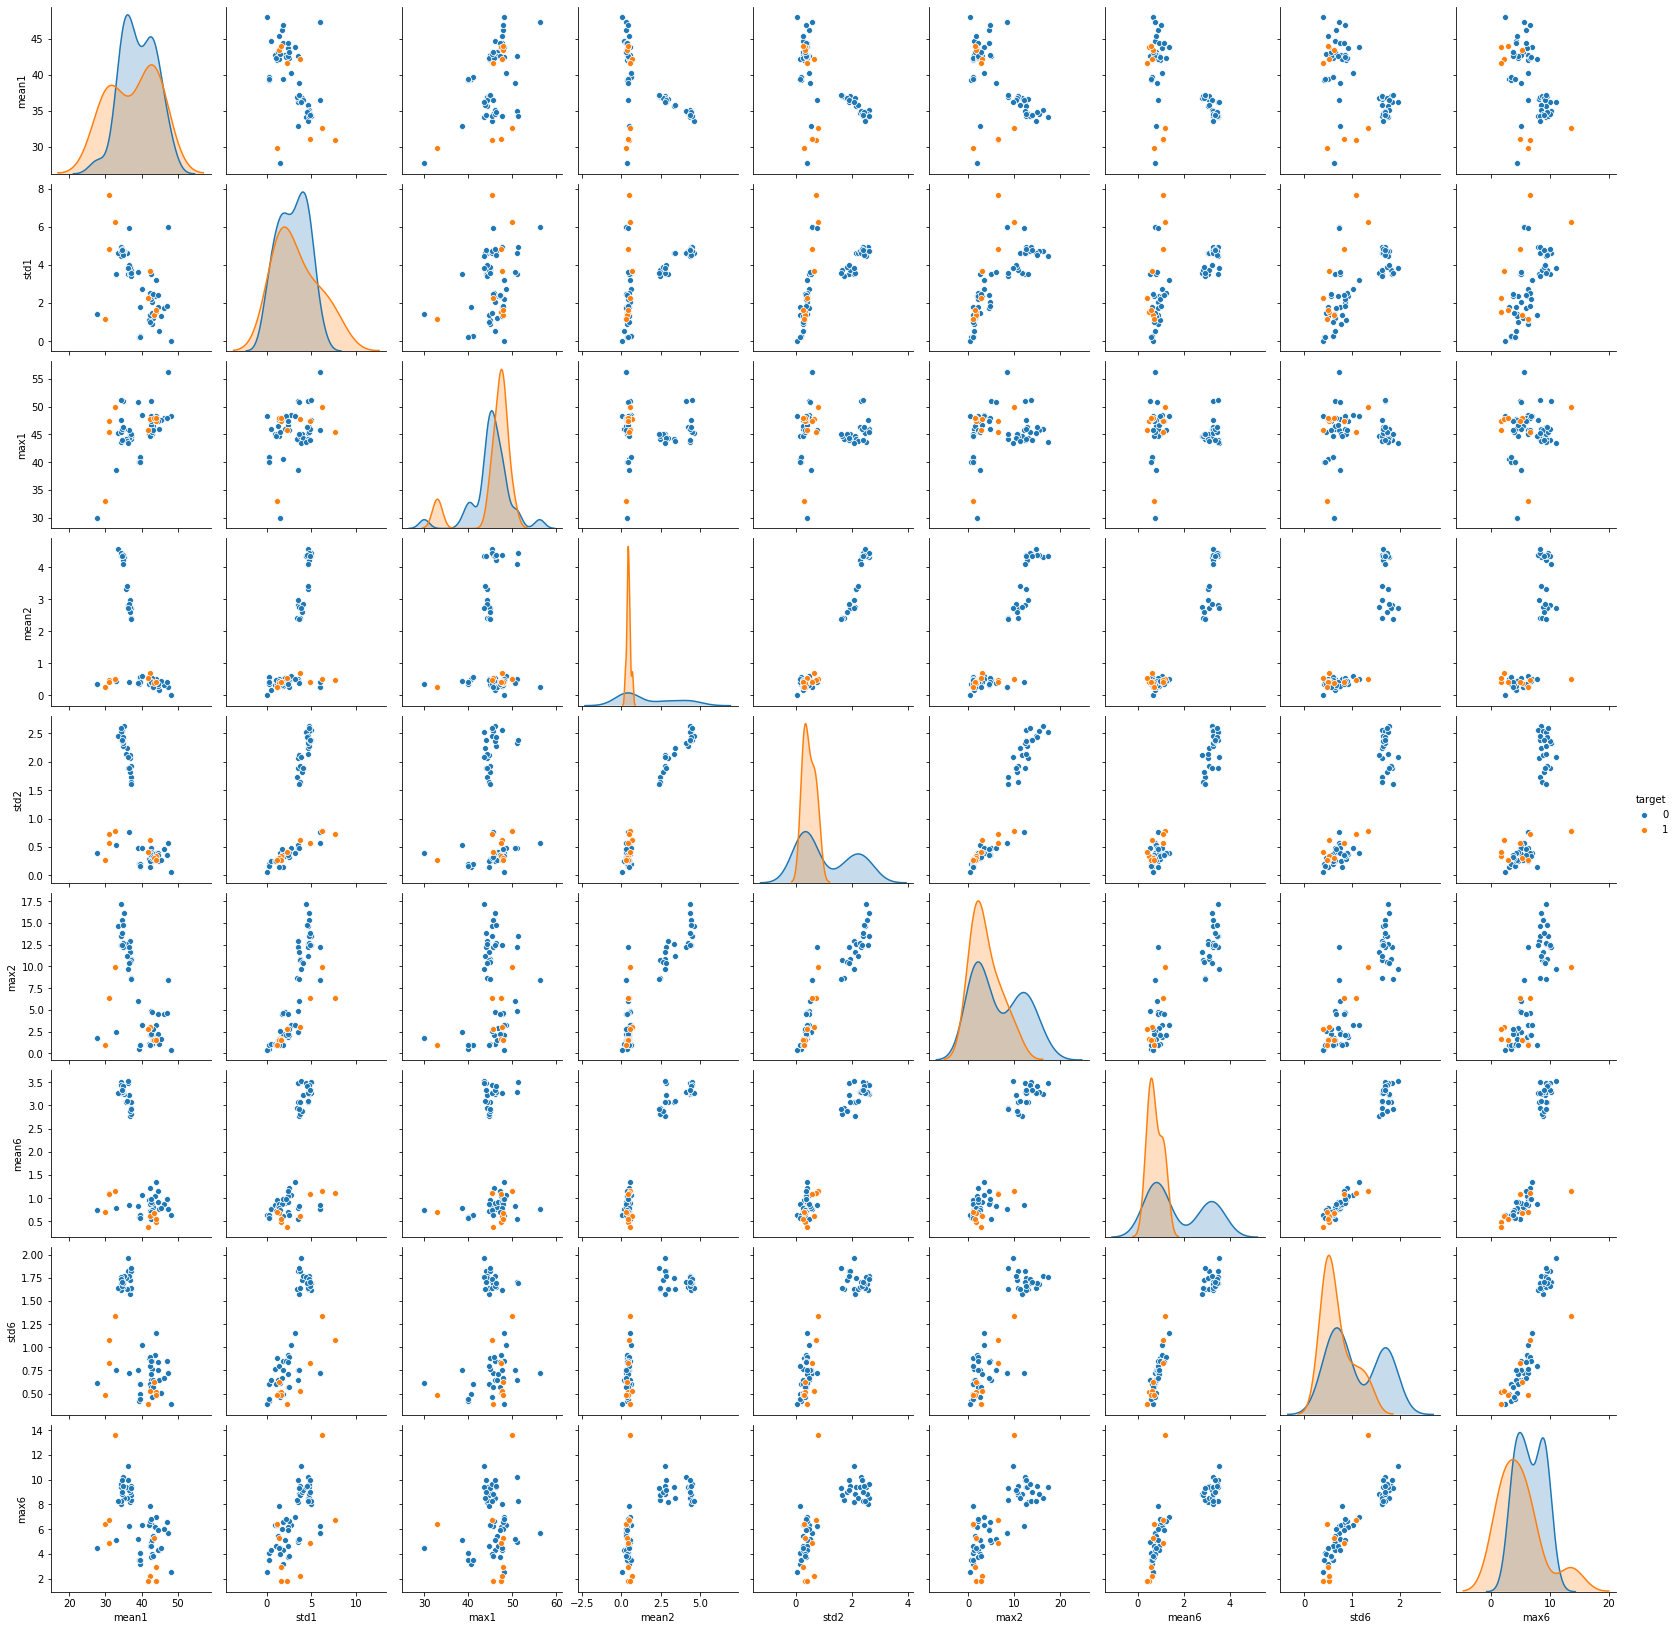

In [10]:
import seaborn as sns
sns.pairplot(df_trainplt,hue="target")

# ii  Break each time series in your training set into two (approximately) equal length time series.

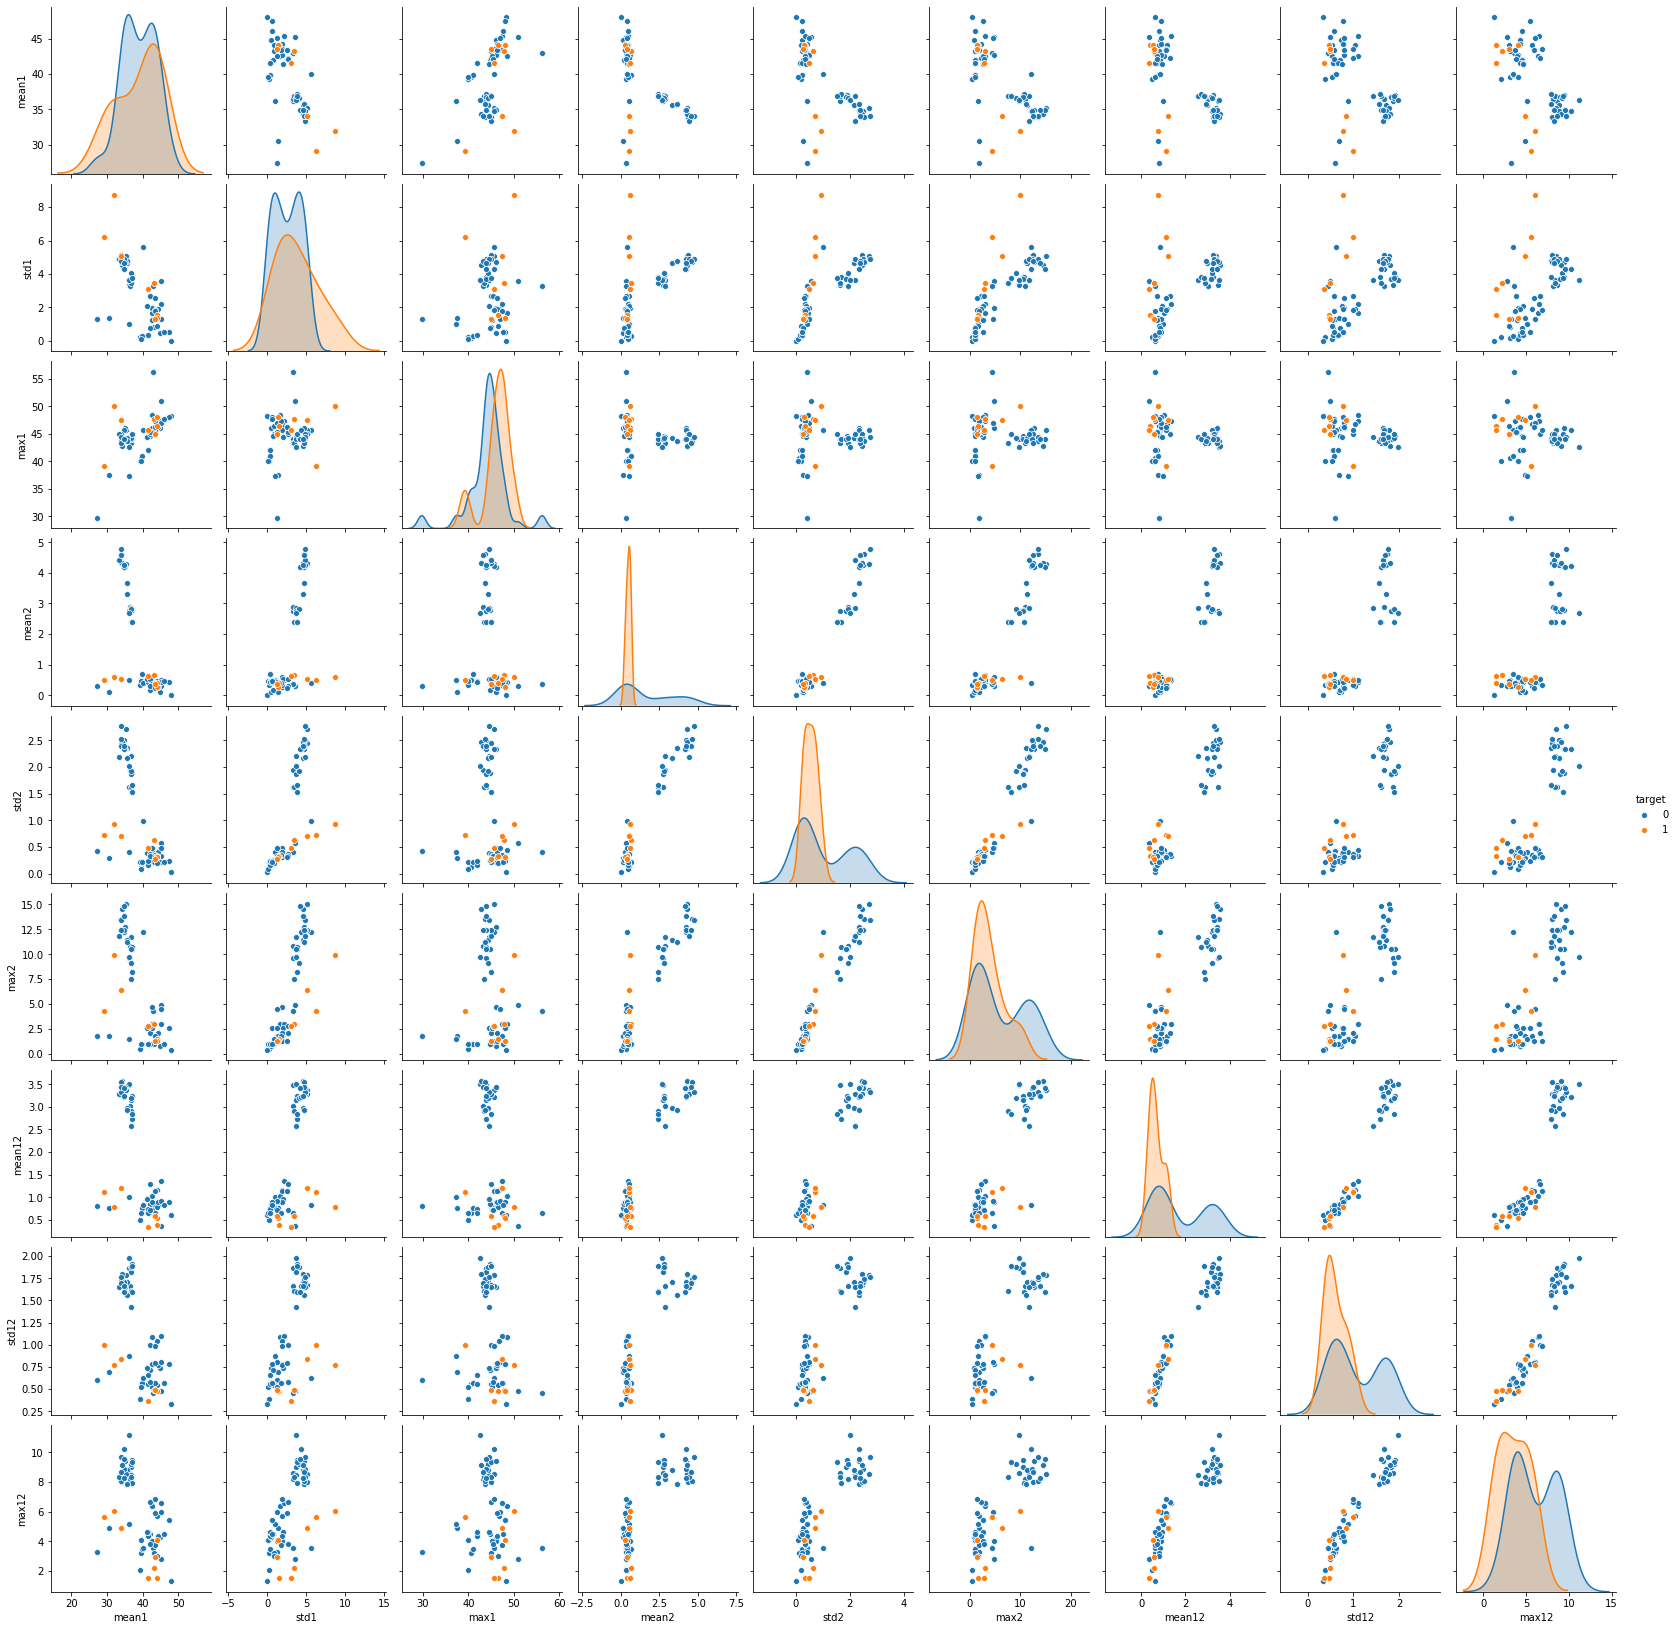

In [29]:
data2 = pd.read_csv(data_all[0], skiprows=4, usecols=[1,2,3,4,5,6])
data22 = pd.concat([data2[:240].reset_index(drop=True), data2[240:].reset_index(drop=True)], axis=1)
data2L = data22.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
colnames2 = [['min'+str(x), 'max'+str(x), 'mean'+str(x), 'median'+str(x), 'std'+str(x), '1stQ'+str(x), '3rdQ'+str(x)] for x in range(1,13)]
colnames2 = list(chain.from_iterable(colnames2))
df_fe2 = pd.DataFrame(data2L.to_numpy().reshape(1,-1), columns=colnames2)
for file in data_all[1:]:
    temp_df = pd.read_csv(file, skiprows=4, usecols=[1,2,3,4,5,6])
    temp_df = pd.concat([temp_df[:240].reset_index(drop=True), temp_df[240:].reset_index(drop=True)], axis=1)
    temp_file_long = temp_df.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    df_fe2 = pd.concat([df_fe2, pd.DataFrame(temp_file_long.to_numpy().reshape(1,-1), columns=colnames2)])
df_fe2.reset_index(drop=True, inplace=True)
target = []
for s in data_all:
    activity = s.split('/')[-2]
    temp=re.search('\D+', activity)[0]
    if temp=="bending":
        act=1
    else:
        act=0
    target.append(act)
    
df_fe2['target'] = target
df_fe2=df_fe2.drop([0,1,7,8,13,14,15,28,29,30,43,44,45,58,59,60,73,74,75])
df_fe2.reset_index(drop=True, inplace=True)    
df_trainplt2=df_fe2[['mean1','std1','max1', 'mean2', 'std2','max2', 'mean12', 'std12', 'max12', 'target']]
sns.pairplot(df_trainplt2,hue="target")           
                    
                    

# There are no significant differences between the two images 

# iii Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length 

In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
import collections
from sklearn.feature_selection import RFECV
import warnings
import numpy as np
warnings.filterwarnings("ignore")
for l in range(1,21):
    dataL = pd.read_csv(data_all[0], skiprows=4, usecols=[1,2,3,4,5,6])
    cut1=range(0,499,int(np.ceil(480/l)))
    cut2 = list(zip(cut1, cut1[1:]))
    dataLL = pd.concat([dataL[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
    dataLLL = dataLL.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    colnamesL = [['min'+str(x), 'max'+str(x), 'mean'+str(x), 'median'+str(x), 'std'+str(x), '1stQ'+str(x), '3rdQ'+str(x)] for x in range(1,l*6+1)]
    colnamesL = list(chain.from_iterable(colnamesL))
  
    df_feL = pd.DataFrame(dataLLL.to_numpy().reshape(1,-1), columns=colnamesL)
    
    for file in data_all[1:]:
        #if file=="/Users/guojiawei/Downloads/AReM/bending2/dataset4.csv" :
            #temp_df  = pd.read_csv(file, skiprows = 5, usecols=[1,2,3,4,5,6],delimiter = " ",index_col = False)
            #print(temp_df)  
        
        #else :
        
        #temp_df = pd.concat([temp_df[:l].reset_index(drop=True) for x,y in cut2], axis=1)  
        temp_df = pd.read_csv(file, skiprows=4, usecols=[1,2,3,4,5,6])
        temp_df = pd.concat([temp_df[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
        temp_file_long = temp_df.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    
        df_feL = pd.concat([df_feL, pd.DataFrame(temp_file_long.to_numpy().reshape(1,-1), columns=colnamesL)])
    #print(df_feL)
    df_feL.reset_index(drop=True, inplace=True)
    col_fe = []
    for col in df_feL.columns:
            col_fe.append(col)
    target = []
    for s in data_all:
        activity = s.split('/')[-2]
        temp=re.search('\D+', activity)[0]
        if temp=="bending":
            act=1
        else:
            act=0
        target.append(act)
    df_feL['target'] = target
    df_feL=df_feL.drop([0,1,7,8,13,14,15,28,29,30,43,44,45,58,59,60,73,74,75])
    df_feL.reset_index(drop=True, inplace=True)  
    train1= df_feL[col_fe]
    train2= df_feL.iloc[:,-1]
    train1= train1.fillna(0)
    train2= train2.fillna(0)
    train2=train2
    #print(train1)
    #print(train2)
    logreg = LogisticRegression()
    rfecv = RFECV(logreg,step=1,cv=5)
    rfe= rfecv.fit(train1, train2)
    pr=rfe.predict(train1)
    F1_score = f1_score(train2,pr)      
    row,p=train1.iloc[:,rfe.get_support()].shape  
    print(p)        
    print( "F1 train score :", F1_score)
    print("current l: ", l)
    #print(dataLLL)
    #print(df_feL)








11
F1 train score : 1.0
current l:  1
65
F1 train score : 1.0
current l:  2
4
F1 train score : 1.0
current l:  3
1
F1 train score : 0.823529411764706
current l:  4
1
F1 train score : 0.823529411764706
current l:  5
14
F1 train score : 1.0
current l:  6
26
F1 train score : 1.0
current l:  7
85
F1 train score : 1.0
current l:  8
1
F1 train score : 0.75
current l:  9
84
F1 train score : 1.0
current l:  10
2
F1 train score : 0.8888888888888888
current l:  11
152
F1 train score : 1.0
current l:  12
54
F1 train score : 1.0
current l:  13
6
F1 train score : 1.0
current l:  14
116
F1 train score : 1.0
current l:  15
29
F1 train score : 1.0
current l:  16
121
F1 train score : 1.0
current l:  17
1
F1 train score : 1.0
current l:  18
1
F1 train score : 1.0
current l:  19
10
F1 train score : 1.0
current l:  20


# iv Report the confusion matrix and show the ROC and AUC 

In [21]:
for l in range(3,4):
    dataL = pd.read_csv(data_all[0], skiprows=4, usecols=[1,2,3,4,5,6])
    cut1=range(0,499,int(np.ceil(480/l)))
    cut2 = list(zip(cut1, cut1[1:]))
    dataLL = pd.concat([dataL[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
    dataLLL = dataLL.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    colnamesL = [['min'+str(x), 'max'+str(x), 'mean'+str(x), 'median'+str(x), 'std'+str(x), '1stQ'+str(x), '3rdQ'+str(x)] for x in range(1,l*6+1)]
    colnamesL = list(chain.from_iterable(colnamesL))
  
    df_feL = pd.DataFrame(dataLLL.to_numpy().reshape(1,-1), columns=colnamesL)
    
    for file in data_all[1:]:
        temp_df = pd.read_csv(file, skiprows=4, usecols=[1,2,3,4,5,6])
        temp_df = pd.concat([temp_df[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
        temp_file_long = temp_df.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    
        df_feL = pd.concat([df_feL, pd.DataFrame(temp_file_long.to_numpy().reshape(1,-1), columns=colnamesL)])
    #print(df_feL)
    df_feL.reset_index(drop=True, inplace=True)
    col_fe = []
    for col in df_feL.columns:
            col_fe.append(col)
    target = []
    for s in data_all:
        activity = s.split('/')[-2]
        temp=re.search('\D+', activity)[0]
        if temp=="bending":
            act=1
        else:
            act=0
        target.append(act)
    df_feL['target'] = target
    df_feL=df_feL.drop([0,1,7,8,13,14,15,28,29,30,43,44,45,58,59,60,73,74,75])
    df_feL.reset_index(drop=True, inplace=True)  
    train1= df_feL[col_fe]
    train2= df_feL.iloc[:,-1]
    logreg = LogisticRegression()
    rfecv = RFECV(logreg,step=1,cv=5)
    rfe= rfecv.fit(train1, train2)
    pr=rfe.predict(train1)
    F1_score = f1_score(train2,pr)      
    row,p=train1.iloc[:,rfe.get_support()].shape  

In [22]:
from sklearn.metrics import confusion_matrix
pr_best=pr
label_best= train2
cm = confusion_matrix(label_best, pr_best)
print("confusion matrix is")
print(cm)

confusion matrix is
[[60  0]
 [ 0  9]]


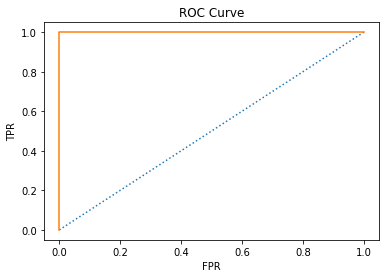

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
train_best=train1.iloc[:,rfe.support_]
#print(train_best)
log = LogisticRegression().fit(train_best, train2) 
pr_bestproplt=log.predict_proba(train_best)[:,1]
pr_bestplt = log.predict(train_best) 
fpr,tpr,thresholds =roc_curve(train2,pr_bestproplt)
plt.plot([0, 1], [0, 1],linestyle='dotted')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [24]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train2, pr_bestplt)
print("AUC:", auc)

AUC: 1.0


In [25]:
from sklearn.feature_selection import chi2
train_best=train1.iloc[:,rfe.support_]
coef=[]
coef = log.coef_ 
#print(coef)
scores, pvalues = chi2(train1, train2)
for i, feature in enumerate(train_best):
    print(feature)
    print("beta is {} p-value is {}".format( round(coef[0][i],5),round(pvalues[i],5)))

mean5
beta is 0.77725 p-value is 0.87295
3rdQ5
beta is 0.59542 p-value is 0.77696
3rdQ7
beta is -0.51958 p-value is 0.63706
max18
beta is -0.4103 p-value is 0.5785


# Test the classifier on the test set.

In [26]:
for l in range(3,4):
    dataL = pd.read_csv(data_all[0], skiprows=4, usecols=[1,2,3,4,5,6])
    cut1=range(0,499,int(np.ceil(480/l)))
    cut2 = list(zip(cut1, cut1[1:]))
    dataLL = pd.concat([dataL[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
    dataLLL = dataLL.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    colnamesL = [['min'+str(x), 'max'+str(x), 'mean'+str(x), 'median'+str(x), 'std'+str(x), '1stQ'+str(x), '3rdQ'+str(x)] for x in range(1,l*6+1)]
    colnamesL = list(chain.from_iterable(colnamesL))
  
    df_feL = pd.DataFrame(dataLLL.to_numpy().reshape(1,-1), columns=colnamesL)
    
    for file in data_all[1:]:
        temp_df = pd.read_csv(file, skiprows=4, usecols=[1,2,3,4,5,6])
        temp_df = pd.concat([temp_df[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
        temp_file_long = temp_df.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    
        df_feL = pd.concat([df_feL, pd.DataFrame(temp_file_long.to_numpy().reshape(1,-1), columns=colnamesL)])
    #print(df_feL)
    df_feL.reset_index(drop=True, inplace=True)
    col_fe = []
    for col in df_feL.columns:
            col_fe.append(col)
    target = []
    for s in data_all:
        activity = s.split('/')[-2]
        temp=re.search('\D+', activity)[0]
        if temp=="bending":
            act=1
        else:
            act=0
        target.append(act)
    df_feL['target'] = target
    #df_feL=df_feL.drop([0,1,7,8,13,14,15,28,29,30,43,44,45,58,59,60,73,74,75])
    #df_feL.reset_index(drop=True, inplace=True)
    df_fete1=df_feL.iloc[0:2]
    df_fete2=df_feL.iloc[7:9]
    df_fete3=df_feL.iloc[13:16]
    df_fete4=df_feL.iloc[28:31]
    df_fete5=df_feL.iloc[43:46]
    df_fete6=df_feL.iloc[58:61]
    df_fete7=df_feL.iloc[73:76]
    df_te=pd.concat([df_fete1,df_fete2,df_fete3,df_fete4,df_fete5,df_fete6,df_fete7],axis=0)
    df_te.reset_index(drop=True, inplace=True)
    test1= df_te[col_fe]
    test2= df_te.iloc[:,-1]
    test1best=test1.iloc[:,rfe.support_]
    #print(df_te)
    testse = log.score(test1best, test2)
    trainse=log.score(train_best,train2)
    print("test accuracy",testse)
    print("train accuracy",trainse)

test accuracy 0.9473684210526315
train accuracy 1.0


# vi Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?
  From the plot and the data above well-separated can cause instability in calculating logistic regression parameters.

# vii From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

In [27]:
print(cm)

[[60  0]
 [ 0  9]]


# 
Yes, I see imbalanced classes

# logistic regression model based on case-control sampling and adjust its parameters.

In [180]:
from  imblearn.over_sampling import SMOTE
for l in range(1,21):
    dataL = pd.read_csv(data_all[0], skiprows=4, usecols=[1,2,3,4,5,6])
    cut1=range(0,499,int(np.ceil(480/l)))
    cut2 = list(zip(cut1, cut1[1:]))
    dataLL = pd.concat([dataL[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
    dataLLL = dataLL.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    colnamesL = [['min'+str(x), 'max'+str(x), 'mean'+str(x), 'median'+str(x), 'std'+str(x), '1stQ'+str(x), '3rdQ'+str(x)] for x in range(1,l*6+1)]
    colnamesL = list(chain.from_iterable(colnamesL))
  
    df_feL = pd.DataFrame(dataLLL.to_numpy().reshape(1,-1), columns=colnamesL)
    sm=SMOTE()
    for file in data_all[1:]:
        temp_df = pd.read_csv(file, skiprows=4, usecols=[1,2,3,4,5,6])
        temp_df = pd.concat([temp_df[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
        temp_file_long = temp_df.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    
        df_feL = pd.concat([df_feL, pd.DataFrame(temp_file_long.to_numpy().reshape(1,-1), columns=colnamesL)])
    #print(df_feL)
    df_feL.reset_index(drop=True, inplace=True)
    col_fe = []
    for col in df_feL.columns:
            col_fe.append(col)
    target = []
    for s in data_all:
        activity = s.split('/')[-2]
        temp=re.search('\D+', activity)[0]
        if temp=="bending":
            act=1
        else:
            act=0
        target.append(act)
    df_feL['target'] = target
    df_feL=df_feL.drop([0,1,7,8,13,14,15,28,29,30,43,44,45,58,59,60,73,74,75])
    df_feL.reset_index(drop=True, inplace=True)  
    train1= df_feL[col_fe]
    train2= df_feL.iloc[:,-1]
    trainre1,trainre2=sm.fit_resample(train1, train2)
    train1=pd.DataFrame(trainre1)
    train2=pd.DataFrame(trainre2)
    logreg = LogisticRegression()
    rfecv = RFECV(logreg,step=1,cv=5)
    rfe= rfecv.fit(train1, train2)
    pr=rfe.predict(train1)
    F1_score = f1_score(train2,pr)      
    row,p=train1.iloc[:,rfe.get_support()].shape
    print(p)
    print( "F1 train score :", F1_score)
    print("current l: ", l)

4
F1 train score : 1.0
current l:  1
9
F1 train score : 1.0
current l:  2
7
F1 train score : 1.0
current l:  3
8
F1 train score : 1.0
current l:  4
7
F1 train score : 1.0
current l:  5
13
F1 train score : 1.0
current l:  6
4
F1 train score : 1.0
current l:  7
7
F1 train score : 1.0
current l:  8
4
F1 train score : 1.0
current l:  9
4
F1 train score : 1.0
current l:  10
4
F1 train score : 1.0
current l:  11
3
F1 train score : 1.0
current l:  12
5
F1 train score : 1.0
current l:  13
4
F1 train score : 1.0
current l:  14
5
F1 train score : 1.0
current l:  15
7
F1 train score : 1.0
current l:  16
4
F1 train score : 1.0
current l:  17
3
F1 train score : 1.0
current l:  18
3
F1 train score : 1.0
current l:  19
2
F1 train score : 1.0
current l:  20


From the data above the l=1 is the best choice

In [182]:
from  imblearn.over_sampling import SMOTE
for l in range(1,2):
    dataL = pd.read_csv(data_all[0], skiprows=4, usecols=[1,2,3,4,5,6])
    cut1=range(0,499,int(np.ceil(480/l)))
    cut2 = list(zip(cut1, cut1[1:]))
    dataLL = pd.concat([dataL[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
    dataLLL = dataLL.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    colnamesL = [['min'+str(x), 'max'+str(x), 'mean'+str(x), 'median'+str(x), 'std'+str(x), '1stQ'+str(x), '3rdQ'+str(x)] for x in range(1,l*6+1)]
    colnamesL = list(chain.from_iterable(colnamesL))
  
    df_feL = pd.DataFrame(dataLLL.to_numpy().reshape(1,-1), columns=colnamesL)
    sm=SMOTE()
    for file in data_all[1:]:
        temp_df = pd.read_csv(file, skiprows=4, usecols=[1,2,3,4,5,6])
        temp_df = pd.concat([temp_df[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
        temp_file_long = temp_df.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    
        df_feL = pd.concat([df_feL, pd.DataFrame(temp_file_long.to_numpy().reshape(1,-1), columns=colnamesL)])
    #print(df_feL)
    df_feL.reset_index(drop=True, inplace=True)
    col_fe = []
    for col in df_feL.columns:
         col_fe.append(col)
    target = []
    for s in data_all:
        activity = s.split('/')[-2]
        temp=re.search('\D+', activity)[0]
        if temp=="bending":
            act=1
        else:
            act=0
        target.append(act)
    df_feL['target'] = target
    df_feL=df_feL.drop([0,1,7,8,13,14,15,28,29,30,43,44,45,58,59,60,73,74,75])
    df_feL.reset_index(drop=True, inplace=True)  
    train1= df_feL[col_fe]
    train2= df_feL.iloc[:,-1]
    #trainre1,trainre2=sm.fit_resample(train1, train2)
    #train1=pd.DataFrame(trainre1)
    #train2=pd.DataFrame(trainre2)
    logreg = LogisticRegression()
    rfecv = RFECV(logreg,step=1,cv=5)
    rfe= rfecv.fit(train1, train2)
    pr=rfe.predict(train1)
    F1_score = f1_score(train2,pr)      
    row,p=train1.iloc[:,rfe.get_support()].shape

In [44]:
train_best1=train1.iloc[:,rfe.support_]

# Confusion matrix, ROC, and AUC of the model.

In [45]:
log=logreg.fit(train_best1,train2)
train2_prpro=log.predict_proba(train_best1)[:,1]
train2_pr=log.predict(train_best1) 
cm = confusion_matrix(train2, train2_pr)
print(cm)

[[60  0]
 [ 0 60]]


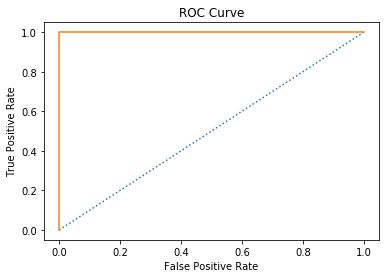

In [46]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(train2, train2_prpro)
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [47]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train2, train2_prpro)
print("auc score:", auc)


auc score: 1.0


# (e) Binary Classification Using L1-penalized logistic regression

# (e) i Repeat 1(d)iii using L1-penalized logistic regression,8 i.e. instead of using p-values for variable selection, use L1 regularization. 

In [184]:
from  imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import normalize
logcv_list=list()
L1sc_list=list()
acc_list=list()
for l in range(1,21):
    dataL = pd.read_csv(data_all[0], skiprows=4, usecols=[1,2,3,4,5,6])
    cut1=range(0,499,int(np.ceil(480/l)))
    cut2 = list(zip(cut1, cut1[1:]))
    dataLL = pd.concat([dataL[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
    dataLLL = dataLL.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    colnamesL = [['min'+str(x), 'max'+str(x), 'mean'+str(x), 'median'+str(x), 'std'+str(x), '1stQ'+str(x), '3rdQ'+str(x)] for x in range(1,l*6+1)]
    colnamesL = list(chain.from_iterable(colnamesL))
  
    df_feL = pd.DataFrame(dataLLL.to_numpy().reshape(1,-1), columns=colnamesL)
    #sm=SMOTE()
    for file in data_all[1:]:
        temp_df = pd.read_csv(file, skiprows=4, usecols=[1,2,3,4,5,6])
        temp_df = pd.concat([temp_df[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
        temp_file_long = temp_df.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    
        df_feL = pd.concat([df_feL, pd.DataFrame(temp_file_long.to_numpy().reshape(1,-1), columns=colnamesL)])
    #print(df_feL)
    df_feL.reset_index(drop=True, inplace=True)
    col_fe = []
    for col in df_feL.columns:
         col_fe.append(col)
    target = []
    for s in data_all:
        activity = s.split('/')[-2]
        temp=re.search('\D+', activity)[0]
        if temp=="bending":
            act=1
        else:
            act=0
        target.append(act)
    df_feL['target'] = target
    df_feL=df_feL.drop([0,1,7,8,13,14,15,28,29,30,43,44,45,58,59,60,73,74,75])
    df_feL.reset_index(drop=True, inplace=True)  
    train1= df_feL[col_fe]
    train1=normalize(train1,norm='l1')
    train2= df_feL.iloc[:,-1]
    trainre1,trainre2=sm.fit_resample(train1, train2)
    train1=pd.DataFrame(trainre1)
    train2=pd.DataFrame(trainre2)
    logcv = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear').fit(train1, train2) 
    l1sc=f1_score(train2, logcv.predict(train1))
    L1sc_list.append(l1sc)
    acc_list.append(logcv.score(train1,train2))
    logcv_list.append(logcv)

In [185]:
l_best = acc_list.index(max(acc_list)) + 1
print("Best l : ",l_best)

Best l :  1


# (e)ii Compare the L1-penalized with variable selection using p-values. 
the accuracy of using p-values is better than L1-penalized with variable. But L1-penalized with variable is easier to implement than p-values.

# (f) i Multi-class Classification (The Realistic Case)

In [99]:
from  imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import normalize
logcv_list=list()
L1sc_list=list()
acc_list=list()
for l in range(1,21):
    dataL = pd.read_csv(data_all[0], skiprows=4, usecols=[1,2,3,4,5,6])
    cut1=range(0,499,int(np.ceil(480/l)))
    cut2 = list(zip(cut1, cut1[1:]))
    dataLL = pd.concat([dataL[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
    dataLLL = dataLL.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    colnamesL = [['min'+str(x), 'max'+str(x), 'mean'+str(x), 'median'+str(x), 'std'+str(x), '1stQ'+str(x), '3rdQ'+str(x)] for x in range(1,l*6+1)]
    colnamesL = list(chain.from_iterable(colnamesL))
  
    df_feL = pd.DataFrame(dataLLL.to_numpy().reshape(1,-1), columns=colnamesL)
    #sm=SMOTE()
    for file in data_all[1:]:
        temp_df = pd.read_csv(file, skiprows=4, usecols=[1,2,3,4,5,6])
        temp_df = pd.concat([temp_df[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
        temp_file_long = temp_df.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    
        df_feL = pd.concat([df_feL, pd.DataFrame(temp_file_long.to_numpy().reshape(1,-1), columns=colnamesL)])
    #print(df_feL)
    df_feL.reset_index(drop=True, inplace=True)
    col_fe = []
    for col in df_feL.columns:
         col_fe.append(col)
    target = []
    for s in data_all:
        activity = s.split('/')[-2]
        temp=re.search('\D+', activity)[0]
        if temp=="bending":
            act=1
        if temp=="cycling":
            act=2
        if temp=="lying":
            act=3
        if temp=="sitting":
            act=4
        if temp=="standing":
            act=5
        if temp=="walking":
            act=6
        target.append(act)
    df_feL['target'] = target
    df_feL=df_feL.drop([0,1,7,8,13,14,15,28,29,30,43,44,45,58,59,60,73,74,75])
    df_feL.reset_index(drop=True, inplace=True)  
    train1= df_feL[col_fe]
    train1=normalize(train1,norm='l1')
    train2= df_feL.iloc[:,-1]
    trainre1,trainre2=sm.fit_resample(train1, train2)
    train1=pd.DataFrame(trainre1)
    train2=pd.DataFrame(trainre2)
    logcv = LogisticRegressionCV(cv=5, penalty='l1', solver='saga',multi_class='multinomial').fit(train1, train2) 
    l1sc=f1_score(train2, logcv.predict(train1),average="macro")
    L1sc_list.append(l1sc)
    acc_list.append(logcv.score(train1,train2))
    logcv_list.append(logcv)

   

In [144]:
l_best = acc_list.index(max(acc_list)) + 1
print("Best l : ",l_best)

Best l :  1


In [110]:
from  imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import normalize
logcv_list=list()
L1sc_list=list()
acc_list=list()
for l in range(1,2):
    dataL = pd.read_csv(data_all[0], skiprows=4, usecols=[1,2,3,4,5,6])
    cut1=range(0,499,int(np.ceil(480/l)))
    cut2 = list(zip(cut1, cut1[1:]))
    dataLL = pd.concat([dataL[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
    dataLLL = dataLL.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    colnamesL = [['min'+str(x), 'max'+str(x), 'mean'+str(x), 'median'+str(x), 'std'+str(x), '1stQ'+str(x), '3rdQ'+str(x)] for x in range(1,l*6+1)]
    colnamesL = list(chain.from_iterable(colnamesL))
  
    df_feL = pd.DataFrame(dataLLL.to_numpy().reshape(1,-1), columns=colnamesL)
    sm=SMOTE()
    for file in data_all[1:]:
        temp_df = pd.read_csv(file, skiprows=4, usecols=[1,2,3,4,5,6])
        temp_df = pd.concat([temp_df[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
        temp_file_long = temp_df.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    
        df_feL = pd.concat([df_feL, pd.DataFrame(temp_file_long.to_numpy().reshape(1,-1), columns=colnamesL)])
    #print(df_feL)
    df_feL.reset_index(drop=True, inplace=True)
    col_fe = []
    for col in df_feL.columns:
         col_fe.append(col)
    target = []
    for s in data_all:
        activity = s.split('/')[-2]
        temp=re.search('\D+', activity)[0]
        if temp=="bending":
            act=1
        if temp=="cycling":
            act=2
        if temp=="lying":
            act=3
        if temp=="sitting":
            act=4
        if temp=="standing":
            act=5
        if temp=="walking":
            act=6
        target.append(act)
    df_feL['target'] = target
    df_feL=df_feL.drop([0,1,7,8,13,14,15,28,29,30,43,44,45,58,59,60,73,74,75])
    df_feL.reset_index(drop=True, inplace=True)  
    train1= df_feL[col_fe]
    train1=normalize(train1,norm='l1')
    train2= df_feL.iloc[:,-1]
    trainre1,trainre2=sm.fit_resample(train1, train2)
    train1=pd.DataFrame(trainre1)
    train2=pd.DataFrame(trainre2)
    logcv = LogisticRegressionCV(cv=5, penalty='l1', solver='saga',multi_class='multinomial').fit(train1, train2) 
    l1sc=f1_score(train2, logcv.predict(train1),average="macro")
    L1sc_list.append(l1sc)
    acc_list.append(logcv.score(train1,train2))
    logcv_list.append(logcv)

   

#  Test error

In [112]:
for l in range(1,2):
    dataL = pd.read_csv(data_all[0], skiprows=4, usecols=[1,2,3,4,5,6])
    cut1=range(0,499,int(np.ceil(480/l)))
    cut2 = list(zip(cut1, cut1[1:]))
    dataLL = pd.concat([dataL[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
    dataLLL = dataLL.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    colnamesL = [['min'+str(x), 'max'+str(x), 'mean'+str(x), 'median'+str(x), 'std'+str(x), '1stQ'+str(x), '3rdQ'+str(x)] for x in range(1,l*6+1)]
    colnamesL = list(chain.from_iterable(colnamesL))
  
    df_feL = pd.DataFrame(dataLLL.to_numpy().reshape(1,-1), columns=colnamesL)
    
    for file in data_all[1:]:
        temp_df = pd.read_csv(file, skiprows=4, usecols=[1,2,3,4,5,6])
        temp_df = pd.concat([temp_df[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
        temp_file_long = temp_df.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    
        df_feL = pd.concat([df_feL, pd.DataFrame(temp_file_long.to_numpy().reshape(1,-1), columns=colnamesL)])
    #print(df_feL)
    df_feL.reset_index(drop=True, inplace=True)
    col_fe = []
    for col in df_feL.columns:
            col_fe.append(col)
    target = []
    for s in data_all:
        activity = s.split('/')[-2]
        temp=re.search('\D+', activity)[0]
        if temp=="bending":
            act=1
        if temp=="cycling":
            act=2
        if temp=="lying":
            act=3
        if temp=="sitting":
            act=4
        if temp=="standing":
            act=5
        if temp=="walking":
            act=6
        target.append(act)
    df_feL['target'] = target
    df_fete1=df_feL.iloc[0:2]
    df_fete2=df_feL.iloc[7:9]
    df_fete3=df_feL.iloc[13:16]
    df_fete4=df_feL.iloc[28:31]
    df_fete5=df_feL.iloc[43:46]
    df_fete6=df_feL.iloc[58:61]
    df_fete7=df_feL.iloc[73:76]
    df_te=pd.concat([df_fete1,df_fete2,df_fete3,df_fete4,df_fete5,df_fete6,df_fete7],axis=0)
    df_te.reset_index(drop=True, inplace=True)
    test1= df_te[col_fe]
    test1 = normalize(test1, norm = 'l1')
    test2= df_te.iloc[:,-1]
    testpr=logcv.predict(test1)
    testse =logcv.score(test1, test2)
    print(testpr)

    print("test accuracy",testse)


[1 1 1 1 2 2 2 3 3 3 4 4 4 3 5 5 6 6 6]
test accuracy 0.9473684210526315


# Confusion matrix and ROC curve

In [116]:
cm_mut = confusion_matrix(test2, testpr)
cm_mut = pd.DataFrame(cm_mut,index=['TB', 'TC', 'TL', 'TS', 'TSD', 'TW'],columns = ['PB', 'PC', 'PL', 'PS', 'PSD', 'PW'])
print(cm_mut)

     PB  PC  PL  PS  PSD  PW
TB    4   0   0   0    0   0
TC    0   3   0   0    0   0
TL    0   0   3   0    0   0
TS    0   0   0   3    0   0
TSD   0   0   1   0    2   0
TW    0   0   0   0    0   3


In [134]:
test2prd = logcv.predict_proba(test1)
bepr=[x[0] for x in test2prd]
cypr=[x[1] for x in test2prd]
lypr=[x[2] for x in test2prd]
sitpr=[x[3] for x in test2prd]
sdpr=[x[4] for x in test2prd]
wkpr=[x[5] for x in test2prd]

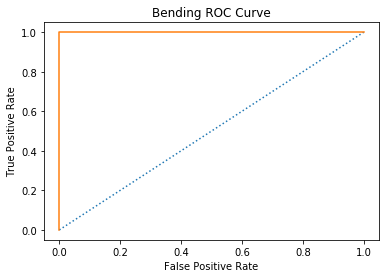

In [135]:
test2_be=test2.apply(lambda x:1 if x==1 else 0)
fpr, tpr, thresholds = roc_curve(test2_be, bepr)
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bending ROC Curve')
plt.show()

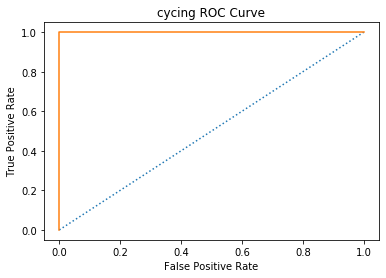

In [140]:
test2_cyc=test2.apply(lambda x:1 if x==2 else 0)
fpr, tpr, thresholds = roc_curve(test2_cyc, cypr)
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('cycing ROC Curve')
plt.show()

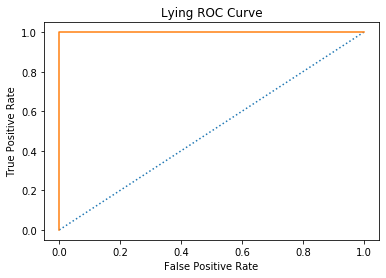

In [137]:
test2_ly=test2.apply(lambda x:1 if x==3 else 0)
fpr, tpr, thresholds = roc_curve(test2_ly, lypr)
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Lying ROC Curve')
plt.show()

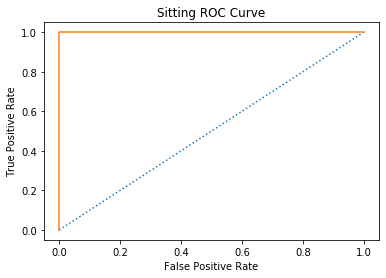

In [141]:
test2_sit=test2.apply(lambda x:1 if x==4 else 0)
fpr, tpr, thresholds = roc_curve(test2_sit, sitpr)
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Sitting ROC Curve')
plt.show()

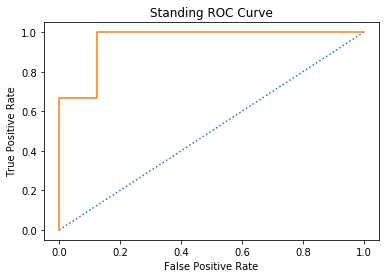

In [139]:
test2_std=test2.apply(lambda x:1 if x==5 else 0)
fpr, tpr, thresholds = roc_curve(test2_std, sdpr)
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Standing ROC Curve')
plt.show()

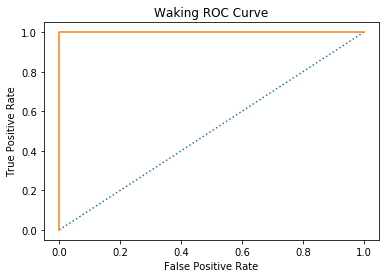

In [142]:
test2_wk=test2.apply(lambda x:1 if x==6 else 0)
fpr, tpr, thresholds = roc_curve(test2_wk, wkpr)
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Waking ROC Curve')
plt.show()

# (f)ii Repeat 1(f)i using a Na ̈ıve Bayes’ classifier. Use both Gaussian and Multi- nomial priors and compare the results.

In [143]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Multi- nomial Na ̈ıve Bayes’ classifier

In [145]:
Muba_list=list()
Mubasc_list=list()
Mubaac_list=list()
from  imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import normalize
for l in range(1,21):
    dataL = pd.read_csv(data_all[0], skiprows=4, usecols=[1,2,3,4,5,6])
    cut1=range(0,499,int(np.ceil(480/l)))
    cut2 = list(zip(cut1, cut1[1:]))
    dataLL = pd.concat([dataL[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
    dataLLL = dataLL.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    colnamesL = [['min'+str(x), 'max'+str(x), 'mean'+str(x), 'median'+str(x), 'std'+str(x), '1stQ'+str(x), '3rdQ'+str(x)] for x in range(1,l*6+1)]
    colnamesL = list(chain.from_iterable(colnamesL))
  
    df_feL = pd.DataFrame(dataLLL.to_numpy().reshape(1,-1), columns=colnamesL)
    #sm=SMOTE()
    for file in data_all[1:]:
        temp_df = pd.read_csv(file, skiprows=4, usecols=[1,2,3,4,5,6])
        temp_df = pd.concat([temp_df[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
        temp_file_long = temp_df.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    
        df_feL = pd.concat([df_feL, pd.DataFrame(temp_file_long.to_numpy().reshape(1,-1), columns=colnamesL)])
    #print(df_feL)
    df_feL.reset_index(drop=True, inplace=True)
    col_fe = []
    for col in df_feL.columns:
         col_fe.append(col)
    target = []
    for s in data_all:
        activity = s.split('/')[-2]
        temp=re.search('\D+', activity)[0]
        if temp=="bending":
            act=1
        if temp=="cycling":
            act=2
        if temp=="lying":
            act=3
        if temp=="sitting":
            act=4
        if temp=="standing":
            act=5
        if temp=="walking":
            act=6
        target.append(act)
    df_feL['target'] = target
    df_feL=df_feL.drop([0,1,7,8,13,14,15,28,29,30,43,44,45,58,59,60,73,74,75])
    df_feL.reset_index(drop=True, inplace=True)  
    train1= df_feL[col_fe]
    #train1=normalize(train1,norm='l1')
    train2= df_feL.iloc[:,-1]
    Muba=MultinomialNB().fit(train1, train2)
    Mubaac_list.append(Muba.score(train1,train2))
    Muba_list.append(logcv)

   

In [147]:
Mubaac_list.append(Muba.score(train1,train2))
l_best = Mubaac_list.index(max(Mubaac_list)) + 1
print("Best l : ",l_best)

Best l :  6


In [148]:
Muba_list=list()
Mubasc_list=list()
Mubaac_list=list()
from  imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import normalize
for l in range(6,7):
    dataL = pd.read_csv(data_all[0], skiprows=4, usecols=[1,2,3,4,5,6])
    cut1=range(0,499,int(np.ceil(480/l)))
    cut2 = list(zip(cut1, cut1[1:]))
    dataLL = pd.concat([dataL[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
    dataLLL = dataLL.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    colnamesL = [['min'+str(x), 'max'+str(x), 'mean'+str(x), 'median'+str(x), 'std'+str(x), '1stQ'+str(x), '3rdQ'+str(x)] for x in range(1,l*6+1)]
    colnamesL = list(chain.from_iterable(colnamesL))
  
    df_feL = pd.DataFrame(dataLLL.to_numpy().reshape(1,-1), columns=colnamesL)
    #sm=SMOTE()
    for file in data_all[1:]:
        temp_df = pd.read_csv(file, skiprows=4, usecols=[1,2,3,4,5,6])
        temp_df = pd.concat([temp_df[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
        temp_file_long = temp_df.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    
        df_feL = pd.concat([df_feL, pd.DataFrame(temp_file_long.to_numpy().reshape(1,-1), columns=colnamesL)])
    #print(df_feL)
    df_feL.reset_index(drop=True, inplace=True)
    col_fe = []
    for col in df_feL.columns:
         col_fe.append(col)
    target = []
    for s in data_all:
        activity = s.split('/')[-2]
        temp=re.search('\D+', activity)[0]
        if temp=="bending":
            act=1
        if temp=="cycling":
            act=2
        if temp=="lying":
            act=3
        if temp=="sitting":
            act=4
        if temp=="standing":
            act=5
        if temp=="walking":
            act=6
        target.append(act)
    df_feL['target'] = target
    df_feL=df_feL.drop([0,1,7,8,13,14,15,28,29,30,43,44,45,58,59,60,73,74,75])
    df_feL.reset_index(drop=True, inplace=True)  
    train1= df_feL[col_fe]
    #train1=normalize(train1,norm='l1')
    train2= df_feL.iloc[:,-1]
    Muba=MultinomialNB().fit(train1, train2)
    
    Mubasc=f1_score(train2, Muba.predict(train1),average="macro")
    Mubaac_list.append(Muba.score(train1,train2))
  

   

In [177]:
for l in range(6,7):
    dataL = pd.read_csv(data_all[0], skiprows=4, usecols=[1,2,3,4,5,6])
    cut1=range(0,499,int(np.ceil(480/l)))
    cut2 = list(zip(cut1, cut1[1:]))
    dataLL = pd.concat([dataL[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
    dataLLL = dataLL.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    colnamesL = [['min'+str(x), 'max'+str(x), 'mean'+str(x), 'median'+str(x), 'std'+str(x), '1stQ'+str(x), '3rdQ'+str(x)] for x in range(1,l*6+1)]
    colnamesL = list(chain.from_iterable(colnamesL))
  
    df_feL = pd.DataFrame(dataLLL.to_numpy().reshape(1,-1), columns=colnamesL)
    
    for file in data_all[1:]:
        temp_df = pd.read_csv(file, skiprows=4, usecols=[1,2,3,4,5,6])
        temp_df = pd.concat([temp_df[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
        temp_file_long = temp_df.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    
        df_feL = pd.concat([df_feL, pd.DataFrame(temp_file_long.to_numpy().reshape(1,-1), columns=colnamesL)])
    #print(df_feL)
    df_feL.reset_index(drop=True, inplace=True)
    col_fe = []
    for col in df_feL.columns:
            col_fe.append(col)
    target = []
    for s in data_all:
        activity = s.split('/')[-2]
        temp=re.search('\D+', activity)[0]
        if temp=="bending":
            act=1
        if temp=="cycling":
            act=2
        if temp=="lying":
            act=3
        if temp=="sitting":
            act=4
        if temp=="standing":
            act=5
        if temp=="walking":
            act=6
        target.append(act)
    df_feL['target'] = target
    df_fete1=df_feL.iloc[0:2]
    df_fete2=df_feL.iloc[7:9]
    df_fete3=df_feL.iloc[13:16]
    df_fete4=df_feL.iloc[28:31]
    df_fete5=df_feL.iloc[43:46]
    df_fete6=df_feL.iloc[58:61]
    df_fete7=df_feL.iloc[73:76]
    df_te=pd.concat([df_fete1,df_fete2,df_fete3,df_fete4,df_fete5,df_fete6,df_fete7],axis=0)
    df_te.reset_index(drop=True, inplace=True)
    test1= df_te[col_fe]
    #test1 = normalize(test1, norm = 'l1')
    test2= df_te.iloc[:,-1]
    testpr=Muba.predict(test1)
    testse =Muba.score(test1, test2)

# Multi- nomial Na ̈ıve Bayes’ classifier confusion matrix and ROC

In [155]:
cm_muba = confusion_matrix(test2, testpr)
cm_muba=pd.DataFrame(cm_muba,index=['TB', 'TC', 'TL', 'TS', 'TSD', 'TW'],columns = ['PB', 'PC', 'PL', 'PS', 'PSD', 'PW'])
print(cm_muba)

     PB  PC  PL  PS  PSD  PW
TB    4   0   0   0    0   0
TC    0   3   0   0    0   0
TL    0   0   3   0    0   0
TS    0   0   0   2    1   0
TSD   0   0   0   2    1   0
TW    0   0   0   0    0   3


In [156]:
test2prdba = Muba.predict_proba(test1)
bepr=[x[0] for x in test2prdba]
cypr=[x[1] for x in test2prdba]
lypr=[x[2] for x in test2prdba]
sitpr=[x[3] for x in test2prdba]
sdpr=[x[4] for x in test2prdba]
wkpr=[x[5] for x in test2prdba]

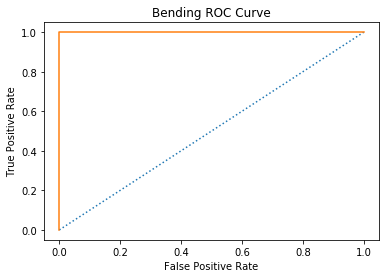

In [157]:
test2_be=test2.apply(lambda x:1 if x==1 else 0)
fpr, tpr, thresholds = roc_curve(test2_be, bepr)
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bending ROC Curve')
plt.show()

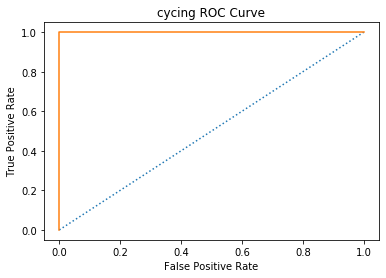

In [158]:
test2_cyc=test2.apply(lambda x:1 if x==2 else 0)
fpr, tpr, thresholds = roc_curve(test2_cyc, cypr)
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('cycing ROC Curve')
plt.show()

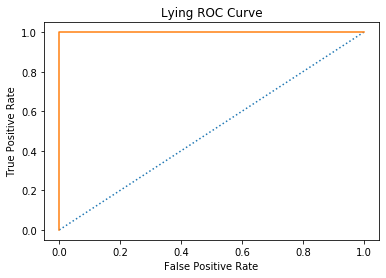

In [159]:
test2_ly=test2.apply(lambda x:1 if x==3 else 0)
fpr, tpr, thresholds = roc_curve(test2_ly, lypr)
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Lying ROC Curve')
plt.show()

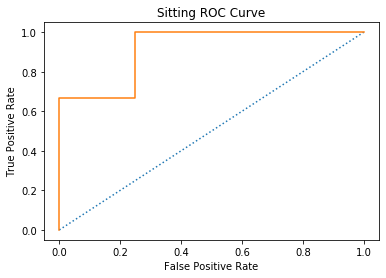

In [160]:
test2_sit=test2.apply(lambda x:1 if x==4 else 0)
fpr, tpr, thresholds = roc_curve(test2_sit, sitpr)
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Sitting ROC Curve')
plt.show()

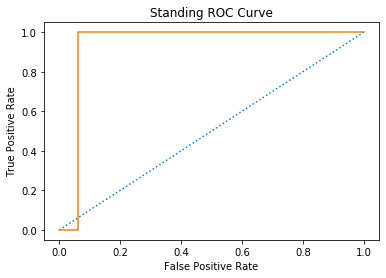

In [161]:
test2_std=test2.apply(lambda x:1 if x==5 else 0)
fpr, tpr, thresholds = roc_curve(test2_std, sdpr)
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Standing ROC Curve')
plt.show()

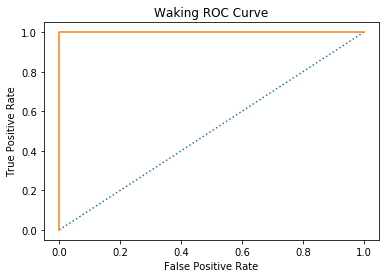

In [162]:
test2_wk=test2.apply(lambda x:1 if x==6 else 0)
fpr, tpr, thresholds = roc_curve(test2_wk, wkpr)
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Waking ROC Curve')
plt.show()

# Gaussian  Na ̈ıve Bayes’ classifier

In [163]:

GBaac_list=list()
from  imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import normalize
for l in range(1,21):
    dataL = pd.read_csv(data_all[0], skiprows=4, usecols=[1,2,3,4,5,6])
    cut1=range(0,499,int(np.ceil(480/l)))
    cut2 = list(zip(cut1, cut1[1:]))
    dataLL = pd.concat([dataL[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
    dataLLL = dataLL.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    colnamesL = [['min'+str(x), 'max'+str(x), 'mean'+str(x), 'median'+str(x), 'std'+str(x), '1stQ'+str(x), '3rdQ'+str(x)] for x in range(1,l*6+1)]
    colnamesL = list(chain.from_iterable(colnamesL))
  
    df_feL = pd.DataFrame(dataLLL.to_numpy().reshape(1,-1), columns=colnamesL)
    #sm=SMOTE()
    for file in data_all[1:]:
        temp_df = pd.read_csv(file, skiprows=4, usecols=[1,2,3,4,5,6])
        temp_df = pd.concat([temp_df[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
        temp_file_long = temp_df.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    
        df_feL = pd.concat([df_feL, pd.DataFrame(temp_file_long.to_numpy().reshape(1,-1), columns=colnamesL)])
    #print(df_feL)
    df_feL.reset_index(drop=True, inplace=True)
    col_fe = []
    for col in df_feL.columns:
         col_fe.append(col)
    target = []
    for s in data_all:
        activity = s.split('/')[-2]
        temp=re.search('\D+', activity)[0]
        if temp=="bending":
            act=1
        if temp=="cycling":
            act=2
        if temp=="lying":
            act=3
        if temp=="sitting":
            act=4
        if temp=="standing":
            act=5
        if temp=="walking":
            act=6
        target.append(act)
    df_feL['target'] = target
    df_feL=df_feL.drop([0,1,7,8,13,14,15,28,29,30,43,44,45,58,59,60,73,74,75])
    df_feL.reset_index(drop=True, inplace=True)  
    train1= df_feL[col_fe]
    #train1=normalize(train1,norm='l1')
    train2= df_feL.iloc[:,-1]
    GB=GaussianNB().fit(train1, train2)
    GBaac_list.append(GB.score(train1,train2))

   

In [164]:

l_best = GBaac_list.index(max(GBaac_list)) + 1
print("Best l : ",l_best)

Best l :  9


In [166]:

GBaac_list=list()
from  imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import normalize
for l in range(9,10):
    dataL = pd.read_csv(data_all[0], skiprows=4, usecols=[1,2,3,4,5,6])
    cut1=range(0,499,int(np.ceil(480/l)))
    cut2 = list(zip(cut1, cut1[1:]))
    dataLL = pd.concat([dataL[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
    dataLLL = dataLL.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    colnamesL = [['min'+str(x), 'max'+str(x), 'mean'+str(x), 'median'+str(x), 'std'+str(x), '1stQ'+str(x), '3rdQ'+str(x)] for x in range(1,l*6+1)]
    colnamesL = list(chain.from_iterable(colnamesL))
  
    df_feL = pd.DataFrame(dataLLL.to_numpy().reshape(1,-1), columns=colnamesL)
    #sm=SMOTE()
    for file in data_all[1:]:
        temp_df = pd.read_csv(file, skiprows=4, usecols=[1,2,3,4,5,6])
        temp_df = pd.concat([temp_df[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
        temp_file_long = temp_df.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    
        df_feL = pd.concat([df_feL, pd.DataFrame(temp_file_long.to_numpy().reshape(1,-1), columns=colnamesL)])
    #print(df_feL)
    df_feL.reset_index(drop=True, inplace=True)
    col_fe = []
    for col in df_feL.columns:
         col_fe.append(col)
    target = []
    for s in data_all:
        activity = s.split('/')[-2]
        temp=re.search('\D+', activity)[0]
        if temp=="bending":
            act=1
        if temp=="cycling":
            act=2
        if temp=="lying":
            act=3
        if temp=="sitting":
            act=4
        if temp=="standing":
            act=5
        if temp=="walking":
            act=6
        target.append(act)
    df_feL['target'] = target
    df_feL=df_feL.drop([0,1,7,8,13,14,15,28,29,30,43,44,45,58,59,60,73,74,75])
    df_feL.reset_index(drop=True, inplace=True)  
    train1= df_feL[col_fe]
    #train1=normalize(train1,norm='l1')
    train2= df_feL.iloc[:,-1]
    GB=GaussianNB().fit(train1, train2)
    GBaac_list.append(GB.score(train1,train2))

   

In [178]:
for l in range(9,10):
    dataL = pd.read_csv(data_all[0], skiprows=4, usecols=[1,2,3,4,5,6])
    cut1=range(0,499,int(np.ceil(480/l)))
    cut2 = list(zip(cut1, cut1[1:]))
    dataLL = pd.concat([dataL[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
    dataLLL = dataLL.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    colnamesL = [['min'+str(x), 'max'+str(x), 'mean'+str(x), 'median'+str(x), 'std'+str(x), '1stQ'+str(x), '3rdQ'+str(x)] for x in range(1,l*6+1)]
    colnamesL = list(chain.from_iterable(colnamesL))
  
    df_feL = pd.DataFrame(dataLLL.to_numpy().reshape(1,-1), columns=colnamesL)
    
    for file in data_all[1:]:
        temp_df = pd.read_csv(file, skiprows=4, usecols=[1,2,3,4,5,6])
        temp_df = pd.concat([temp_df[x:y].reset_index(drop=True) for x,y in cut2], axis=1)
        temp_file_long = temp_df.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
    
        df_feL = pd.concat([df_feL, pd.DataFrame(temp_file_long.to_numpy().reshape(1,-1), columns=colnamesL)])
    #print(df_feL)
    df_feL.reset_index(drop=True, inplace=True)
    col_fe = []
    for col in df_feL.columns:
            col_fe.append(col)
    target = []
    for s in data_all:
        activity = s.split('/')[-2]
        temp=re.search('\D+', activity)[0]
        if temp=="bending":
            act=1
        if temp=="cycling":
            act=2
        if temp=="lying":
            act=3
        if temp=="sitting":
            act=4
        if temp=="standing":
            act=5
        if temp=="walking":
            act=6
        target.append(act)
    df_feL['target'] = target
    df_fete1=df_feL.iloc[0:2]
    df_fete2=df_feL.iloc[7:9]
    df_fete3=df_feL.iloc[13:16]
    df_fete4=df_feL.iloc[28:31]
    df_fete5=df_feL.iloc[43:46]
    df_fete6=df_feL.iloc[58:61]
    df_fete7=df_feL.iloc[73:76]
    df_te=pd.concat([df_fete1,df_fete2,df_fete3,df_fete4,df_fete5,df_fete6,df_fete7],axis=0)
    df_te.reset_index(drop=True, inplace=True)
    test1= df_te[col_fe]
    #test1 = normalize(test1, norm = 'l1')
    test2= df_te.iloc[:,-1]
    testpr=GB.predict(test1)
    testse =GB.score(test1, test2)

# Gaussian Na ̈ıve Bayes’ classifier confusion matrix and ROC

In [169]:
cm_GBba = confusion_matrix(test2, testpr)
cm_GBba=pd.DataFrame(cm_GBba,index=['TB', 'TC', 'TL', 'TS', 'TSD', 'TW'],columns = ['PB', 'PC', 'PL', 'PS', 'PSD', 'PW'])
print(cm_GBba)

     PB  PC  PL  PS  PSD  PW
TB    2   1   1   0    0   0
TC    0   3   0   0    0   0
TL    0   0   3   0    0   0
TS    0   0   0   3    0   0
TSD   0   0   0   1    2   0
TW    0   0   0   0    0   3


In [170]:
test2prdGB = GB.predict_proba(test1)
bepr=[x[0] for x in test2prdGB]
cypr=[x[1] for x in test2prdGB]
lypr=[x[2] for x in test2prdGB]
sitpr=[x[3] for x in test2prdGB]
sdpr=[x[4] for x in test2prdGB]
wkpr=[x[5] for x in test2prdGB]

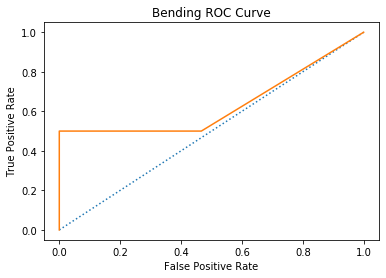

In [171]:
test2_be=test2.apply(lambda x:1 if x==1 else 0)
fpr, tpr, thresholds = roc_curve(test2_be, bepr)
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bending ROC Curve')
plt.show()

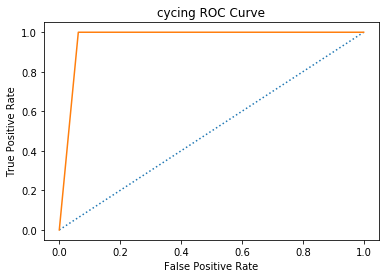

In [172]:
test2_cyc=test2.apply(lambda x:1 if x==2 else 0)
fpr, tpr, thresholds = roc_curve(test2_cyc, cypr)
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('cycing ROC Curve')
plt.show()

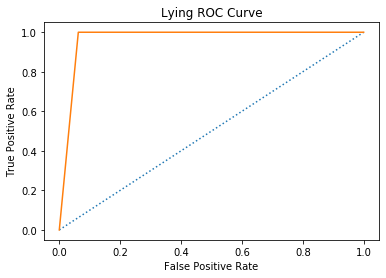

In [173]:
test2_ly=test2.apply(lambda x:1 if x==3 else 0)
fpr, tpr, thresholds = roc_curve(test2_ly, lypr)
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Lying ROC Curve')
plt.show()

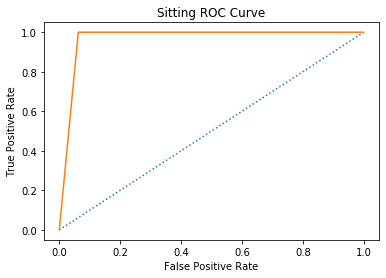

In [174]:
test2_sit=test2.apply(lambda x:1 if x==4 else 0)
fpr, tpr, thresholds = roc_curve(test2_sit, sitpr)
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Sitting ROC Curve')
plt.show()

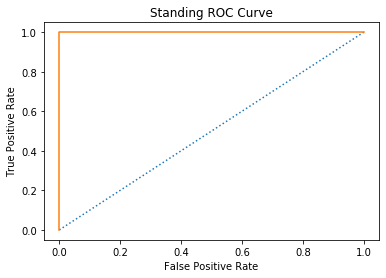

In [175]:
test2_std=test2.apply(lambda x:1 if x==5 else 0)
fpr, tpr, thresholds = roc_curve(test2_std, sdpr)
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Standing ROC Curve')
plt.show()

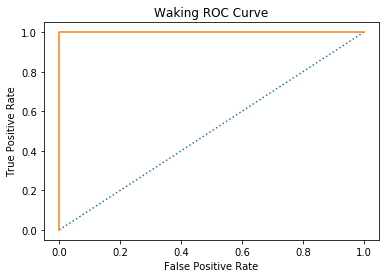

In [179]:
test2_wk=test2.apply(lambda x:1 if x==6 else 0)
fpr, tpr, thresholds = roc_curve(test2_wk, wkpr)
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Waking ROC Curve')
plt.show()

# (f)iii. Which method is better for multi-class classification in this problem?

# 
 From the confusion matrix and ROC, the Multi- nomial Na ̈ıve Bayes’ classifier is the best model for multi-class classification